In [4]:
import tensorflow as tf
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from tabulate import tabulate
import missingno as msno

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center">Methodology for handling missing values</h1>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px;">
Handling missing data is an important step of any data analysis. In real life, the study of given processes and phenomena inevitably encounters missing data, which should be subject to preliminary analysis. To reveal the nature of the missing data in general, whether they are completely random, random or non-random. To think about what could be done with them so as not to distort the database drastically, but on the contrary to improve their suitability for objective analysis. This report provides an overview of possible tools for dealing with missing data. The emphasis is not on their research, which as a methodology was done in a previous report, but on working with them. Different methods of visualization, padding and removal are shown in order to enrich the theory and practice of data refinement as a pre-processing step in the field of economic data and others.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px"><b>Types of Missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are four types of missing data:</ul>
<li style="color:black; background-color:white; padding:5px">Missing completely at random (MCAR): The fact that it is missing is independent of the remaining variables.</li>
<li style="color:black; background-color:white; padding:5px">Missing at random (MAR):  The missing value can roughly be interpolated from the remaining values to a reasonable degree of accuracy.</li>
<li style="color:black; background-color:white; padding:5px">Missing not at random (MNAR): The reason why the data is missing is related to the remaining variables</li>
<li style="color:black; background-color:white; padding:5px">Structurally Missing Data: The missing data is missing for а reason.</li>

<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Methods for handling missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are three methods at general:</ul>
<li style="color:black; background-color:white; padding:5px">Remove the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Imputatе missing data;</li>
<li style="color:black; background-color:white; padding:5px">Keep the missing values;</li>

<h2 style="color:black; background-color:yellow; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:yellow; padding:5px; margin-bottom:-10px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations: </ul>
<li style="color:black; background-color:yellow; padding:5px">loading the databasess</li>
<li style="color:black; background-color:yellow; padding:5px">extraction of uniqueness by features and observations</li>
<li style="color:black; background-color:yellow; padding:5px">extraction basic information about the datas</li>
<li style="color:black; background-color:yellow; padding:5px">dataframe trasnformation: features and rows manipulation and transformation</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px;">III. Methodology and empirical analysis </h2>
tuk имаме за базата данни от куде е и т.н.

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:white; padding:5px;">
As a first step, the database is loaded and functions are executed to reveal the main parameters of the data.</p>

In [5]:
def import_data (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [6]:
import_data(df_minimum_wage = "earn_mw_cur")

,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
0,EUR,AL,268.61,248.43,244.56,242.52,209.10,213.45,211.99,210.66,...,74.40,67.06,67.75,62.78,60.13,52.80,52.36,46.98,45.12,NaN
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1842.28,1658.23,1625.72,1625.72,1625.72,1593.81,1593.81,1593.81,...,1186.31,1163.02,1163.02,1140.24,1140.24,1117.88,1095.89,1095.89,1095.89,1074.44
3,EUR,BG,363.02,332.34,332.34,332.34,311.89,311.89,286.33,286.33,...,56.52,56.28,51.24,51.38,43.65,40.42,38.35,34.26,34.26,31.19
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,PPS,SI,1217.79,1217.79,1160.91,1160.91,1072.77,1072.77,1019.61,1019.61,...,566.74,566.74,534.56,534.56,498.73,498.73,484.59,467.30,449.31,449.31
107,PPS,SK,719.80,719.80,694.18,694.18,645.24,645.24,599.52,599.52,...,261.31,261.31,248.05,248.05,225.39,225.39,202.59,202.59,191.81,159.84
108,PPS,TR,NaN,NaN,NaN,NaN,824.57,824.57,846.59,846.59,...,307.40,307.40,321.06,284.10,303.65,253.10,306.51,283.29,360.90,301.06
109,PPS,UK,NaN,NaN,NaN,NaN,1348.67,1269.79,1284.84,1228.01,...,770.21,770.21,743.46,743.46,681.56,681.56,645.38,645.38,624.35,NaN


In [7]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [8]:
uniques(df_minimum_wage)

Names of columns (features): 
Index(['currency', 'geo\time', '2022S2', '2022S1', '2021S2', '2021S1',
       '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2',
       '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1',
       '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2',
       '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1',
       '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2',
       '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1',
       '1999S2', '1999S1'],
      dtype='object')

Elements of columns (observations): "currency": 
 ['EUR' 'NAC' 'PPS']
Number of elements of columns (observations): "currency": 
 3

Elements of columns (observations): "geo\time": 
 ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'US']
Number of elem

In [9]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("-------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------------------------------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")
    print("--------------------------------------------------------------------------------")

    return df.applymap(type).apply(pd.value_counts).fillna(0)

In [10]:
db_info(df_minimum_wage)

1. Оbservations and features: 
 111 Оbservations and 50 features
-------------------------------
2. Number of cases in the table: 5550
--------------------------------
3. The sum of element types by type is as follows: 
 object      2
float64    48
dtype: int64
--------------------------------
4. Group the features by data type:
 object = ['currency', 'geo\\time'] 

 float64 = ['2022S2', '2022S1', '2021S2', '2021S1', '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2', '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1', '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2', '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1', '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2', '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1', '1999S2', '1999S1']
--------------------------------------------------------------------------------


,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
<class 'str'>,111.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0


<p style="color:black; background-color:white; padding:5px;">After we have loaded the data we see that we have two main columns with string format object type. One column marks the unit of measurement and has 3 unique values, and the other the countries and has 37 unique values. In total, there are 111 rows and 50 columns of data. The remaining columns are in numerical format and mark the minimum wage in the period 1999 - 2022.</p>

<p style="color:black; background-color:white; padding:5px;">AWe will make two changes: we will change the direction of the time period and leave only the data related to the unit of measurement: purchasing power parity.</p>

In [11]:
df_minimum_wage = df_minimum_wage[list(df_minimum_wage.columns[:2]) + list(df_minimum_wage.columns[:1:-1])]
df_minimum_wage.head()

,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
0,EUR,AL,NaN,45.12,46.98,52.36,52.80,60.13,62.78,67.75,...,180.52,190.58,210.66,211.99,213.45,209.10,242.52,244.56,248.43,268.61
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1074.44,1095.89,1095.89,1095.89,1117.88,1140.24,1140.24,1163.02,...,1562.59,1562.59,1593.81,1593.81,1593.81,1625.72,1625.72,1625.72,1658.23,1842.28
3,EUR,BG,31.19,34.26,34.26,38.35,40.42,43.65,51.38,51.24,...,260.76,260.76,286.33,286.33,311.89,311.89,332.34,332.34,332.34,363.02
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_minimum_wage_pps = df_minimum_wage[df_minimum_wage["currency"] == 'PPS']
df_minimum_wage_pps.head()

,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,PPS,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,402.45,429.28
75,PPS,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,PPS,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,1053.30,1074.34,...,1362.77,1362.77,1387.68,1387.68,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,PPS,BG,83.00,91.17,89.38,100.05,100.06,107.66,126.34,126.34,...,502.79,502.79,535.52,535.52,559.40,559.40,597.76,597.76,597.76,652.93
78,PPS,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2. Missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
The purpose of this report is not to analyze missing data and search for patterns. However, there is no way to take steps to handle the missing data without revealing its size and type. This is exactly what is done below, outlining them as a size in absolute and relative value and also outlining their type through a structural matrix.</p>

In [13]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,12))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.18)
    plt.show()

Missing values


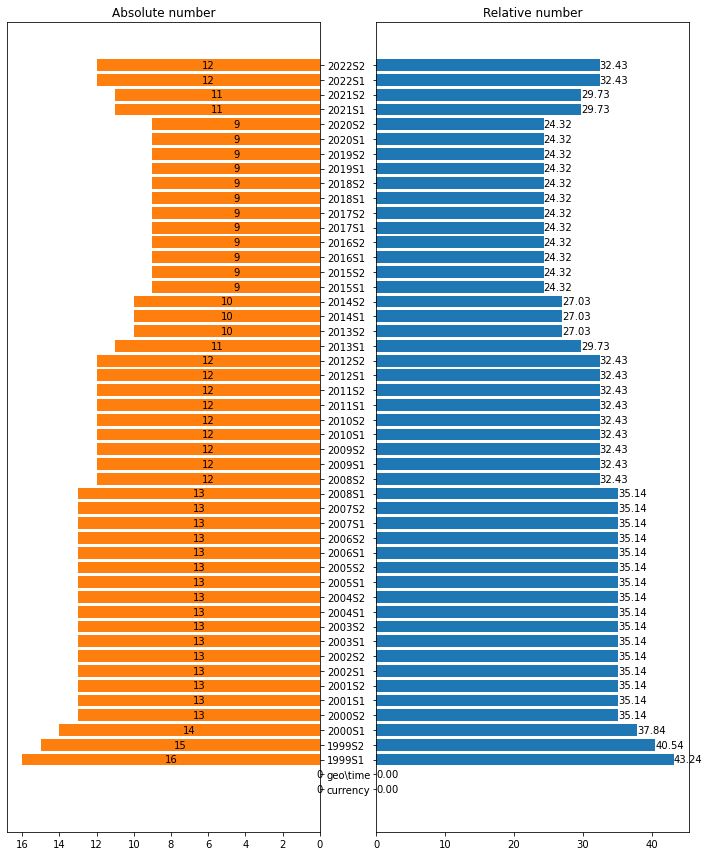

In [14]:
missing_values_features(df_minimum_wage_pps)

<p style="color:black; background-color:white; padding:5px;">As we can see from the missing values plot above, all columns show roughly the same amount of values. They range from 24.32% to 43.24% without the presence of random variations and amplitudes.</p>

<p style="color:black; background-color:white; padding:5px;">Let's look at the missing values in a graphical matrix to see if there are any patterns in the missing values.</p>

<AxesSubplot:>

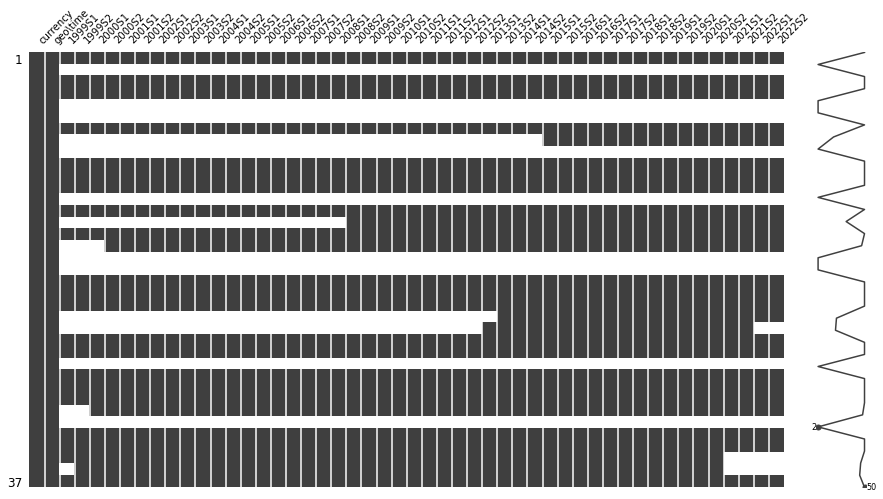

In [15]:
msno.matrix(df_minimum_wage_pps, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The matrix shows us that the missing values are not random. On the contrary, certain countries have missing values in certain time periods with a distinct start and end of the period.</p>

In [16]:
def missing_part (df, percent):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    number = len_results*(percent/100)
    global len_results_notnull

    len_results_notnull = df.loc[df.isnull().sum(1)>=number]
    
    observations_part, features_part = len_results_notnull.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows have {number:.2f} percent missing values")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_notnull)

In [17]:
missing_part(df_minimum_wage_pps, 1)

The database has 48 columns(features) with float type datas
The folowing 17 rows have 0.48 percent missing values
The part of dataframe with filtered missing values is 45.95 % of the whole database


,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
75,PPS,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,PPS,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,PPS,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,PPS,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1423.70,1423.70,1458.09,1458.09,1444.53,1444.53,1467.86,1483.61,1516.95,1615.11
82,PPS,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,PPS,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,PPS,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,656.55,656.55,708.62,708.62,761.19,761.19,793.69,793.69,875.40,875.40
90,PPS,IE,NaN,NaN,NaN,796.41,773.47,826.05,791.12,791.12,...,1203.24,1203.24,1220.06,1220.06,1183.50,1219.73,1230.31,1230.31,1266.50,1266.50
91,PPS,IS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,PPS,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
aaa4 = df_minimum_wage_pps.copy()
aaa4.drop(len_results_notnull.index, inplace=True)

<AxesSubplot:>

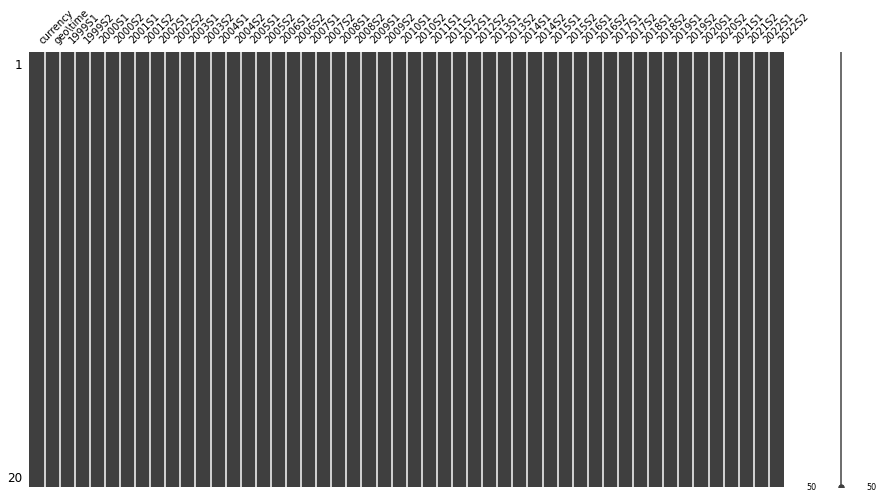

In [19]:
msno.matrix(aaa4, figsize=(15, 8), fontsize=10)